In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import ipywidgets

In [4]:
pip install ipywidgets>=7.0.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv('field 1.csv')
df.head()

,Date,Datatype,NDVI,Max Deg.F,Min Deg.F,Surface Soil Moisture (%),Rootzone Soil Moisture (%),Wind Speed (mph),Humidity (%),Precipitation (inch),Heat Stress,Cold Stress
0,6/25/2023,Historical data,-,93.2,69.8,-,-,4.6,51.5,0.0,0,0
1,6/24/2023,Historical data,-,86.0,60.8,-,-,5.2,67.0,0.0,0,0
2,6/23/2023,Historical data,-,84.2,59.0,-,-,5.4,70.5,0.0,0,0
3,6/22/2023,Historical data,-,69.8,60.8,-,-,4.1,92.0,1.0,0,0
4,6/21/2023,Historical data,-,78.8,66.2,-,-,7.4,83.0,1.1,0,0


In [6]:
df.Datatype.unique()

array(['Historical data'], dtype=object)

In [7]:
df.columns

Index(['Date', 'Datatype', 'NDVI', 'Max Deg.F', 'Min Deg.F',
       'Surface Soil Moisture (%)', 'Rootzone Soil Moisture (%)',
       'Wind Speed (mph)', 'Humidity (%)', 'Precipitation (inch)',
       'Heat Stress', 'Cold Stress'],
      dtype='object')

In [8]:
data = df[df['Datatype']=='Historical data']
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Datatype,NDVI,Max Deg.F,Min Deg.F,Surface Soil Moisture (%),Rootzone Soil Moisture (%),Wind Speed (mph),Humidity (%),Precipitation (inch),Heat Stress,Cold Stress
0,2023-06-25,Historical data,-,93.2,69.8,-,-,4.6,51.5,0.0,0,0
1,2023-06-24,Historical data,-,86.0,60.8,-,-,5.2,67.0,0.0,0,0
2,2023-06-23,Historical data,-,84.2,59.0,-,-,5.4,70.5,0.0,0,0
3,2023-06-22,Historical data,-,69.8,60.8,-,-,4.1,92.0,1.0,0,0
4,2023-06-21,Historical data,-,78.8,66.2,-,-,7.4,83.0,1.1,0,0


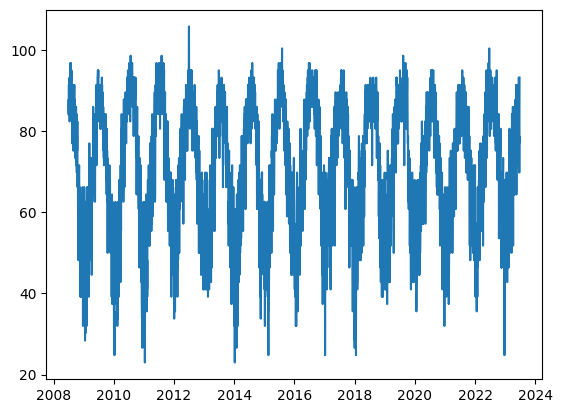

In [9]:
plt.plot(data['Date'], data['Max Deg.F'])
plt.show()

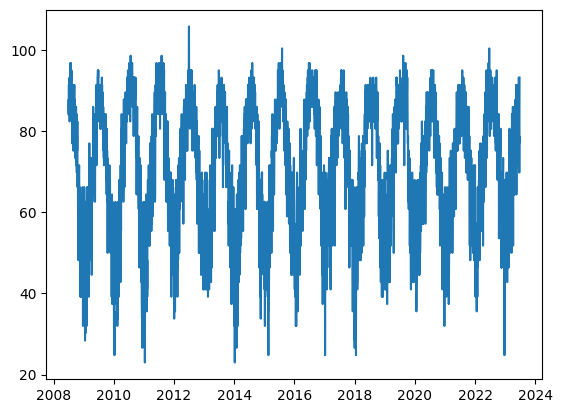

In [10]:
data['Year'] = data['Date'].apply(lambda x: x.year)
plt.plot(data['Date'], data['Max Deg.F'])
plt.show()

In [11]:
datasetMaxTemp = data[['Date', 'Max Deg.F']] 
datasetMaxTemp.dropna(inplace=True)
datasetMaxTemp.columns = ['ds', 'y'] 
datasetMaxTemp.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Kavin Prabhakar\AppData\Local\Temp\ipykernel_21856\4186112527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetMaxTemp.dropna(inplace=True)



,ds,y
0,2023-06-25,93.2
1,2023-06-24,86.0
2,2023-06-23,84.2
3,2023-06-22,69.8
4,2023-06-21,78.8


In [12]:
mMaxTemp = NeuralProphet()

In [13]:
modelMaxTemp = mMaxTemp.fit(datasetMaxTemp, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (171) is too small than the required number for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [19]:
future = mMaxTemp.make_future_dataframe(datasetMaxTemp, periods=50)
forecast = mMaxTemp.predict(future)
print(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.963% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 171it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


           ds     y      yhat1      trend  season_yearly  season_weekly
0  2023-06-26  None  89.075188  72.652885      16.509254      -0.086952
1  2023-06-27  None  89.392334  72.653778      16.578491       0.160068
2  2023-06-28  None  89.678383  72.654663      16.643625       0.380089
3  2023-06-29  None  89.642822  72.655563      16.705055       0.282206
4  2023-06-30  None  89.068947  72.656448      16.763153      -0.350654
5  2023-07-01  None  89.152084  72.657333      16.818287      -0.323537
6  2023-07-02  None  89.467819  72.658234      16.870811      -0.061219
7  2023-07-03  None  89.493233  72.659119      16.921062      -0.086952
8  2023-07-04  None  89.789429  72.660011      16.969351       0.160068
9  2023-07-05  None  90.056961  72.660904      17.015972       0.380089
10 2023-07-06  None  90.005180  72.661789      17.061186       0.282206
11 2023-07-07  None  89.417236  72.662682      17.105213      -0.350654
12 2023-07-08  None  89.488297  72.663574      17.148262      -0

In [15]:
datasetMinTemp = data[['Date', 'Min Deg.F']] 
datasetMinTemp.dropna(inplace=True)
datasetMinTemp.columns = ['ds', 'y'] 
datasetMinTemp.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Kavin Prabhakar\AppData\Local\Temp\ipykernel_21856\2280132288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetMinTemp.dropna(inplace=True)



,ds,y
0,2023-06-25,69.8
1,2023-06-24,60.8
2,2023-06-23,59.0
3,2023-06-22,60.8
4,2023-06-21,66.2


In [20]:
mMinTemp = NeuralProphet()

In [22]:
modelMinTemp = mMinTemp.fit(datasetMinTemp, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (171) is too small than the required number for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [23]:
futureMinTemp = mMinTemp.make_future_dataframe(datasetMinTemp, periods=900)
forecastMinTemp = mMinTemp.predict(futureMinTemp)
forecastMinTemp.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.963% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 171it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-06-26,None,68.041298,52.542892,15.484065,0.014336
1,2023-06-27,None,68.573814,52.541534,15.585706,0.446571
2,2023-06-28,None,68.505852,52.540176,15.682081,0.283597
3,2023-06-29,None,68.430382,52.538818,15.773369,0.118193
4,2023-06-30,None,68.125443,52.537460,15.859754,-0.271774


In [24]:
datasetPrecip = data[['Date', 'Precipitation (inch)']] 
datasetPrecip.dropna(inplace=True)
datasetPrecip.columns = ['ds', 'y'] 
datasetPrecip.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Kavin Prabhakar\AppData\Local\Temp\ipykernel_15572\1851315174.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
0,2023-06-25,0.0
1,2023-06-24,0.0
2,2023-06-23,0.0
3,2023-06-22,1.0
4,2023-06-21,1.1


In [25]:
mPrecip = NeuralProphet()

In [26]:
modelPrecip = mPrecip.fit(datasetPrecip, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (171) is too small than the required number for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [28]:
futurePrecip = mPrecip.make_future_dataframe(datasetPrecip, periods=900)
forecastPrecip = mPrecip.predict(futurePrecip)
forecastPrecip.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.963% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 171it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-06-26,None,0.198258,0.150243,0.035027,0.012988
1,2023-06-27,None,0.184643,0.150231,0.035444,-0.001032
2,2023-06-28,None,0.186972,0.150220,0.035727,0.001024
3,2023-06-29,None,0.190625,0.150209,0.035881,0.004534
4,2023-06-30,None,0.173420,0.150198,0.035912,-0.012690


In [29]:
datasetWind = data[['Date', 'Wind Speed (mph)']] 
datasetWind.dropna(inplace=True)
datasetWind.columns = ['ds', 'y'] 
datasetWind.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Kavin Prabhakar\AppData\Local\Temp\ipykernel_15572\1109431912.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
0,2023-06-25,4.6
1,2023-06-24,5.2
2,2023-06-23,5.4
3,2023-06-22,4.1
4,2023-06-21,7.4


In [30]:
mWind = NeuralProphet()

In [31]:
modelWind = mWind.fit(datasetWind, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (171) is too small than the required number for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [32]:
futureWind = mWind.make_future_dataframe(datasetWind, periods=900)
forecastWind = mWind.predict(futureWind)
forecastWind.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.963% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 171it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-06-26,None,4.834883,5.985917,-1.139453,-0.011581
1,2023-06-27,None,4.738875,5.986270,-1.160046,-0.087349
2,2023-06-28,None,4.752267,5.986623,-1.182408,-0.051949
3,2023-06-29,None,4.855087,5.986977,-1.206497,0.074607
4,2023-06-30,None,4.779044,5.987329,-1.232251,0.023965


In [35]:
datasetHumidity = data[['Date', 'Humidity (%)']] 
datasetHumidity.dropna(inplace=True)
datasetHumidity.columns = ['ds', 'y'] 
datasetHumidity.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Kavin Prabhakar\AppData\Local\Temp\ipykernel_15572\3660831240.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
0,2023-06-25,51.5
1,2023-06-24,67.0
2,2023-06-23,70.5
3,2023-06-22,92.0
4,2023-06-21,83.0


In [36]:
mHumidity = NeuralProphet()

In [37]:
modelHumidity = mHumidity.fit(datasetHumidity, freq='D', epochs=100)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.963% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (171) is too small than the required number for the learning rate finder (243). The results might not be optimal.


Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [38]:
futureHumidity = mHumidity.make_future_dataframe(datasetHumidity, periods=900)
forecastHumidity = mHumidity.predict(futureHumidity)
forecastHumidity.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.963% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency -1D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 171it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-06-26,None,69.245621,69.378998,-0.560383,0.427005
1,2023-06-27,None,69.324074,69.375999,-0.569954,0.518025
2,2023-06-28,None,68.675781,69.373001,-0.581482,-0.115740
3,2023-06-29,None,68.822525,69.370010,-0.594841,0.047359
4,2023-06-30,None,68.292099,69.367020,-0.609883,-0.465035


In [39]:
futureHumidity

,ds,y
0,2023-06-26,None
1,2023-06-27,None
2,2023-06-28,None
3,2023-06-29,None
4,2023-06-30,None
...,...,...
895,2025-12-07,None
896,2025-12-08,None
897,2025-12-09,None
898,2025-12-10,None


In [1]:
plot1 = mHumidity.plot(forecastHumidity)

NameError: name 'mHumidity' is not defined